In [2]:
import pandas as pd
import numpy as np

In [3]:
train=pd.read_csv("cleaned_train.csv")
test=pd.read_csv("cleaned_test.csv")

In [4]:
y_var=train["SalePrice"]
x_var=train[train.columns[train.columns!="SalePrice"]]
real_test_var=test

### Gradient boosting Cross-validation

In [ ]:
import numpy as np
import sklearn.model_selection as ms
ms_k5 = ms.KFold(n_splits=5)

X=x_var
y=y_var
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 1000, 'max_depth': 2, 'min_samples_split': 2, 'learning_rate': 0.02, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)
    
scores = ms.cross_val_score(estimator=clf, X=X, y=y, cv=ms_k5)


In [ ]:
scores.mean()

In [ ]:
mean_error = []
std_error = []
kfold = range(3, 10)
for i in kfold:
    scores = ms.cross_val_score(estimator=clf, X=X, y=y, cv=ms_k5)
    mean_error.append(1 - scores.mean())
    std_error.append(scores.std())
    
import matplotlib.pyplot as plt
s1 = plt.scatter(kfold, mean_error, label='mean error')
plt.plot(kfold, mean_error)
s2 = plt.scatter(kfold, std_error, color='red', label='std')
plt.plot(kfold, std_error, color='red')
plt.xlim(0, 50)
plt.xlabel('number of fold')
plt.legend(handles=[s1, s2], loc=2)
plt.show()

### train_test_split

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.3, random_state=0)

#### parameter tuning

In [ ]:
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

xg=ensemble.GradientBoostingRegressor()

grid_para_xg =[{'n_estimators': [30000], 'max_depth': [4], 'min_samples_split': [6], 
                 'learning_rate': [0.0023,0.002,0.0025], 'loss':['ls'], 'max_features':[18]}]

#max depth 4 #min_sample:6
#max_features 18
grid_search_xg = model_selection.GridSearchCV(xg, grid_para_xg, scoring='neg_mean_squared_error', cv=3, return_train_score=True,  n_jobs=-1)
#scoring:mse
grid_search_xg.fit(x_var, y_var)

In [ ]:
grid_search_xg.cv_results_

In [ ]:
grid_search_xg.best_params_

In [ ]:
grid_search_svm.best_score_

### train test XG

MSE: 881652069.8311


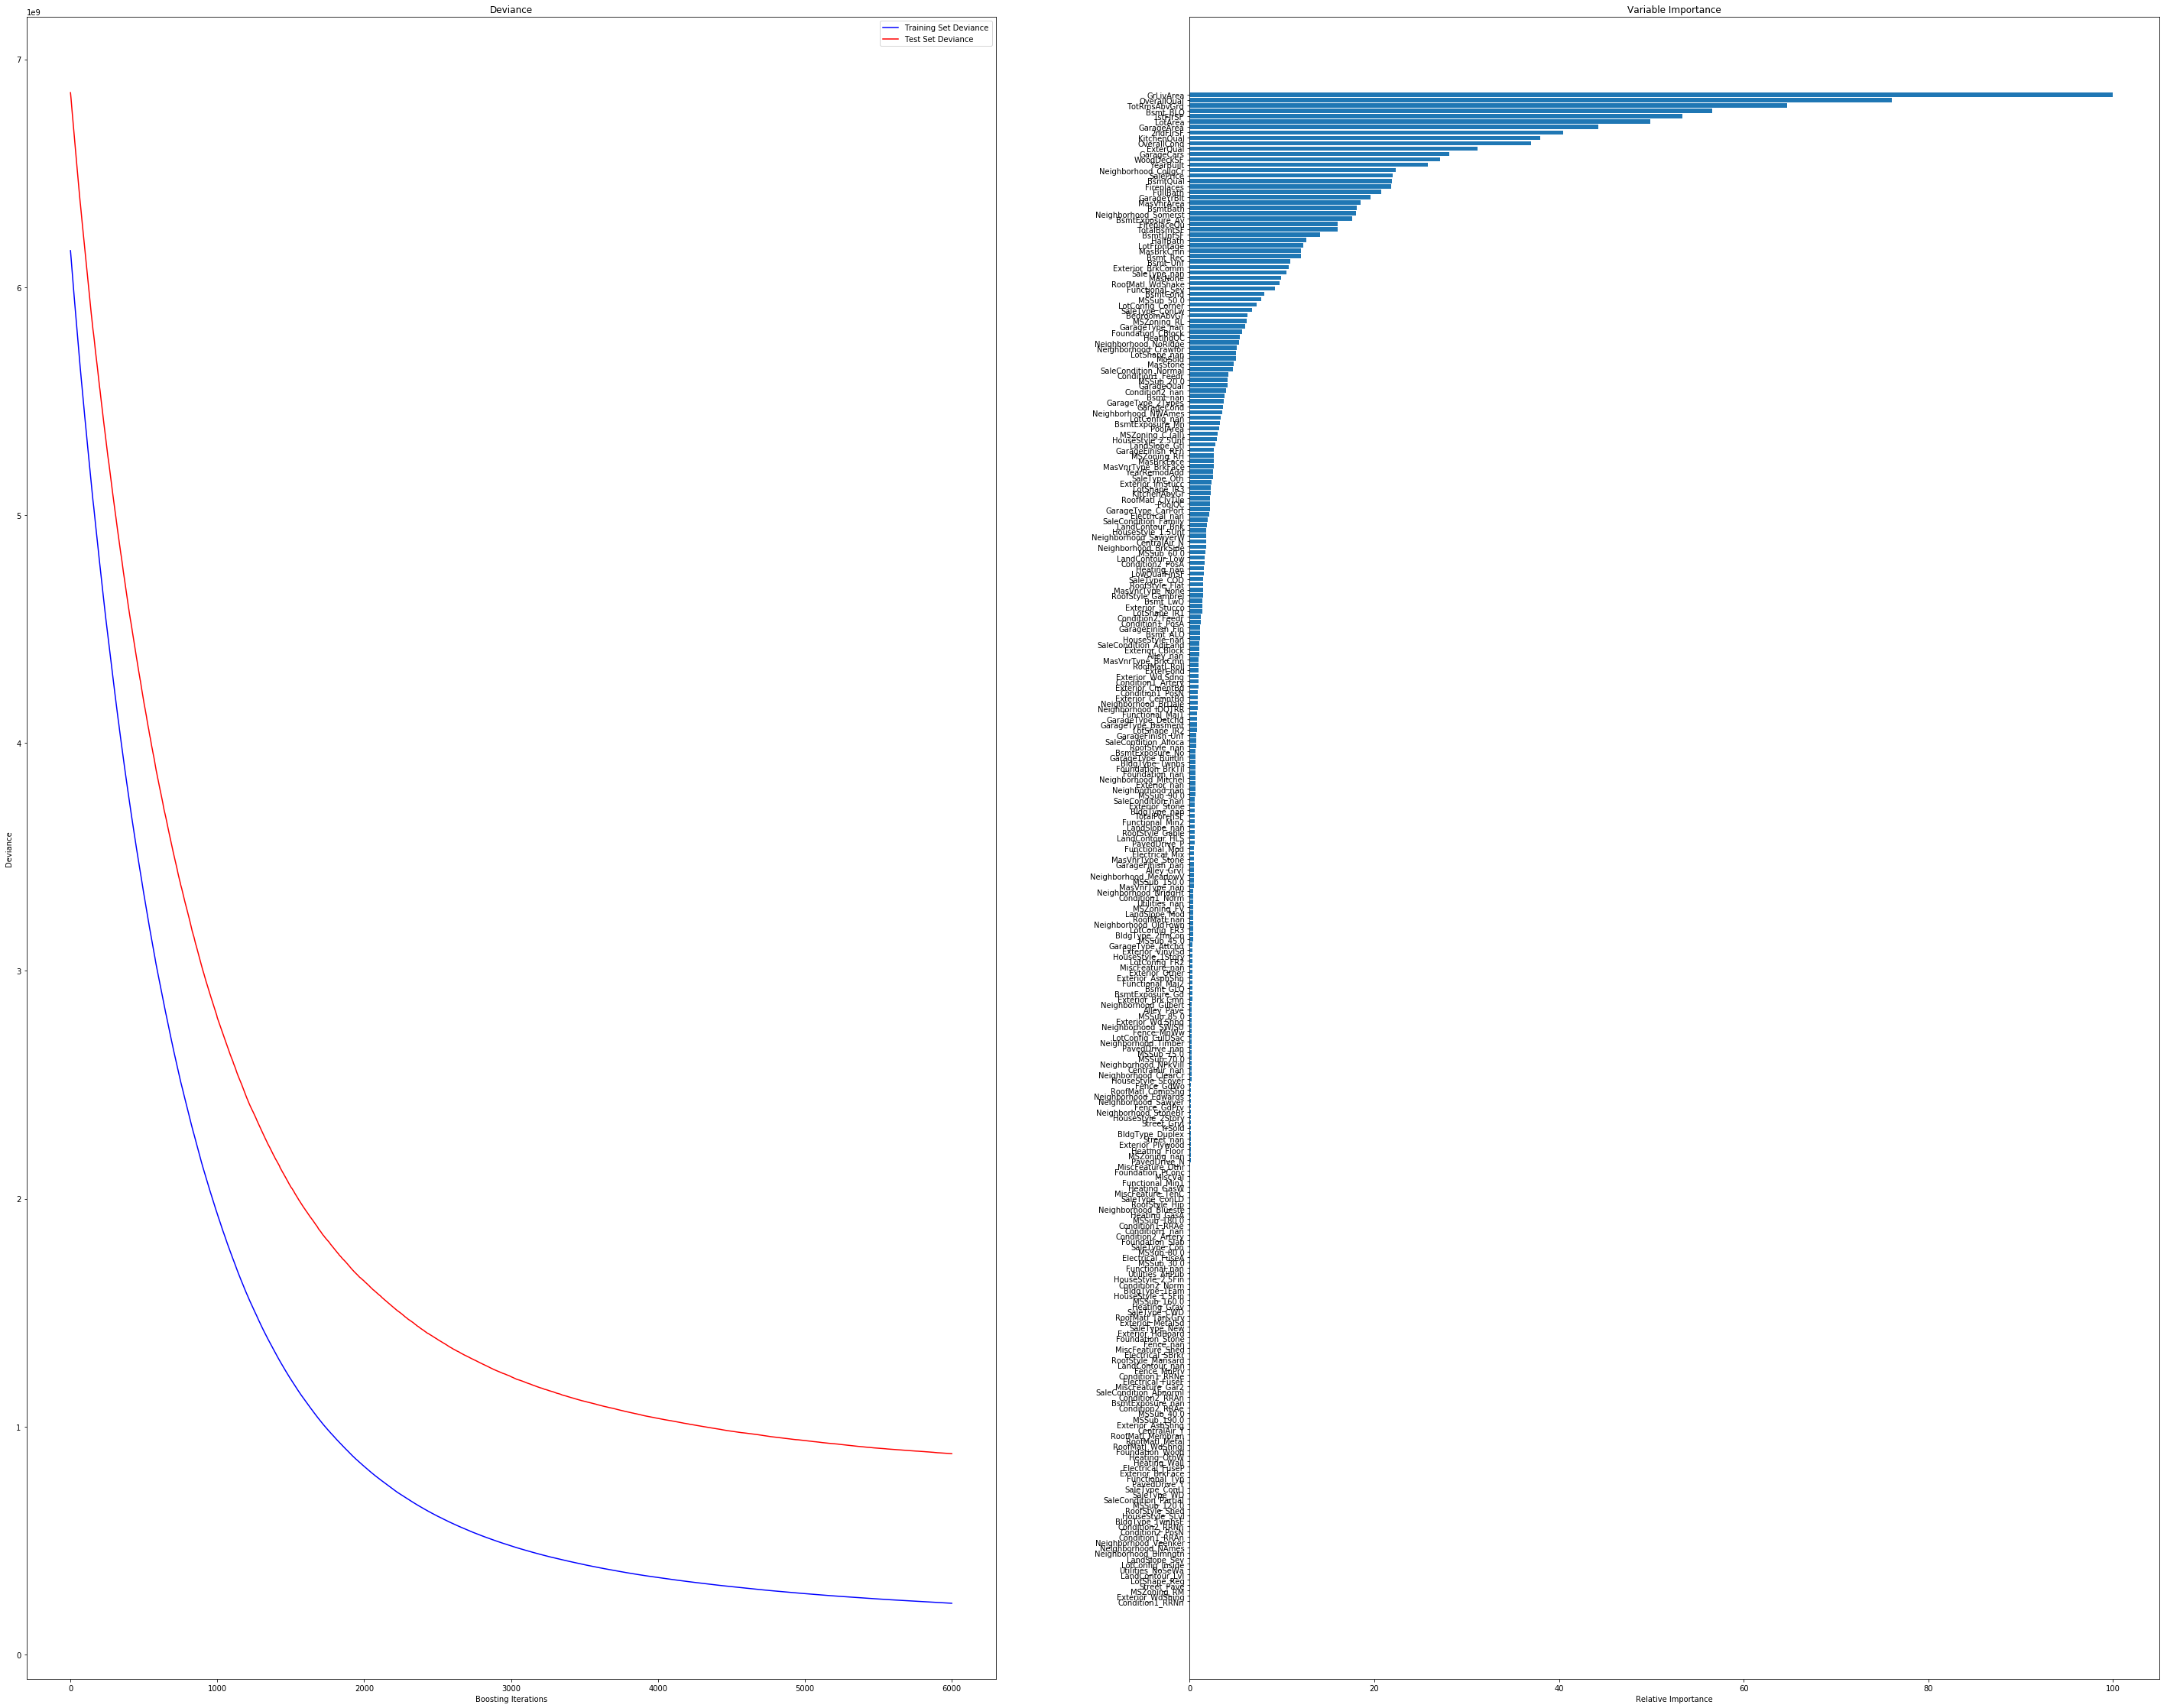

In [22]:
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.2, random_state=20)


from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
params={'n_estimators': 6000, 'max_depth': 4, 'min_samples_split': 6, 
                 'learning_rate': 0.001, 'loss':'ls', 'max_features':18}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(X_train, y_train)
clf.predict(X_test)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)
# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(50, 40))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
          label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
          label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# # #############################################################################
# # Plot feature importance
feature_importance = clf.feature_importances_
# # make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [17]:
test_score

array([6.85279418e+09, 6.84526835e+09, 6.83806614e+09, ...,
       6.97095686e+08, 6.97095721e+08, 6.97095143e+08])

In [18]:
clf.fit(x_var, y_var)
res=clf.predict(real_test_var)
res.shape

(1459,)

In [ ]:
res

In [ ]:
np.savetxt("res.csv", res, delimiter=",")

In [ ]:
from sklearn import linear_model
ols = linear_model.LinearRegression()

In [ ]:
ols.fit(X=x_var,y=y_var)

In [ ]:
ols.coef_

### RR  train-test-split

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltimport

In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [4]:
combined=pd.concat([train,test])
combined.shape #2919
#combined.iloc[:1460:,:] #train
#combined.iloc[1460:,:] #test

C:\Users\samuelmao\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


(2919, 81)

In [5]:
combined=combined.reset_index()

In [6]:
from preprocess import impute
all_data, encodedDic = impute (combined, False)
all_data_onehot, encodedDic = impute (combined, True) #one-hot

In [7]:
train=all_data.iloc[:1460:,:] #train
train_y=train["SalePrice"]
train_x=train[train.columns[train.columns!="SalePrice"]]
test=test.iloc[1460:,:]

train_onehot=all_data_onehot.iloc[:1460:,:] #train
train_y_onehot=train_onehot["SalePrice"]
train_x_onehot=train_onehot[train_onehot.columns[train_onehot.columns!="SalePrice"]]
test_onehot=train_onehot.iloc[1460:,:]


In [6]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha = 1) # create a ridge regression instance
ridge.fit(x_var, y_var) # fit data

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.3, random_state=1)

alpha_100 = np.logspace(0, 8, 100)
msetotal = []
for i in alpha_100:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    mse = mean_squared_error(y_test, ridge.predict(X_test))
    msetotal.append(mse)

In [8]:
msetotal

[1079733795.175154,
 1075095942.8918672,
 1069031410.6923561,
 1061924193.6936414,
 1054173455.5470359,
 1046156490.6493278,
 1038202693.2766763,
 1030580282.1155072,
 1023494538.6185598,
 1017094406.8631861,
 1011483674.0777822,
 1006733363.1861347,
 1002892969.4292059,
 999999315.4356238,
 998082757.446703,
 997171074.083405,
 997291574.4754303,
 998471866.9855583,
 1000739515.613392,
 1004120678.4067101,
 1008637892.6635238,
 1014307421.519606,
 1021136846.4349601,
 1029123678.8138592,
 1038255550.5794978,
 1048512063.8489825,
 1059867811.4337623,
 1072295648.668429,
 1085769164.3819106,
 1100263490.389058,
 1115754000.586103,
 1132212922.2108116,
 1149604290.0164769,
 1167877982.7608647,
 1186963810.4262705,
 1206766763.6593153,
 1227164508.8653033,
 1248007893.8284261,
 1269124592.0748367,
 1290325226.9822748,
 1311410710.040351,
 1332179413.9996145,
 1352433256.0041761,
 1371982540.783162,
 1390650072.946095,
 1408275236.1490853,
 1424718401.1561432,
 1439865421.317177,
 14536314

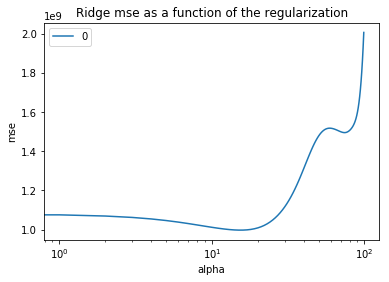

In [9]:
df_mse = pd.DataFrame(msetotal, index=list(range(100)))
import matplotlib.pyplot as plt
title = 'Ridge mse as a function of the regularization'
axes = df_mse.plot(logx=True, title=title)
axes.set_xlabel('alpha')
axes.set_ylabel('mse')
plt.show()

In [20]:
ridge.get_params

<bound method BaseEstimator.get_params of Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)>

### PCA

In [10]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.2, random_state=20)

In [12]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca.n_components_

1

In [14]:
train_img = pca.transform(X_train)
test_img = pca.transform(X_test)

In [15]:
ridge.set_params(alpha = 100)
ridge.fit(train_img, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
mean_squared_error(y_test, ridge.predict(test_img))

6578536428.60889